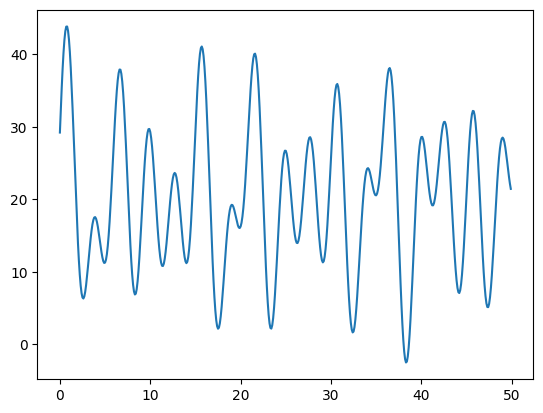

In [2]:
import numpy as np
import matplotlib.pyplot as plt

pm = [3, 5, 7]
am = [10, 8, 6]
thm = [0, np.pi/6, np.pi/3]

a0 = 20

dt = 0.1
n = 500

tt = []
hh = []
for j in range(n):
    t = j * dt
    h = a0 + am[0] * np.sin(2*np.pi / pm[0]*t + thm[0]) \
        + am[1] * np.sin(2*np.pi / pm[1]*t + thm[1]) \
        + am[2] * np.sin(2*np.pi / pm[2]*t + thm[2])
    tt.append(t)
    hh.append(h)
plt.plot(tt, hh)
plt.show()

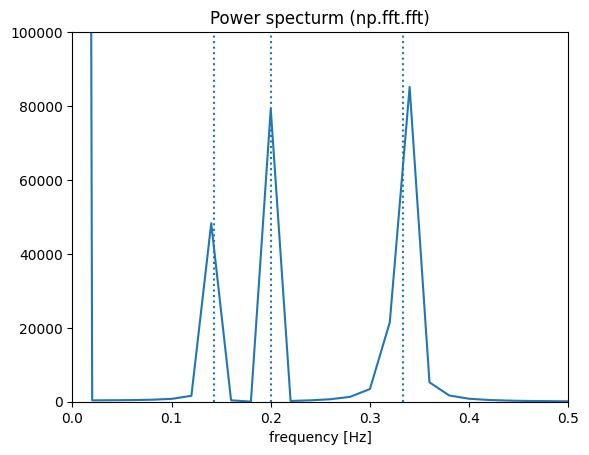

In [ ]:
time_delta = dt
fs = 1 / time_delta
freqs = np.fft.fftfreq(np.size(hh), 1 / fs)  # 这里获得的是x轴，然后1/fs属于是控制不同的单位。
idx = np.argsort(freqs)

pds = np.abs(np.fft.fft(hh)) ** 2 * time_delta * time_delta  # 计算功率谱

ff = []
pp = []
for i in range(len(idx)):
    if freqs[idx[i]] < 0:
        continue
    ff.append(freqs[idx[i]])
    pp.append(2 * pds[idx[i]])

plt.axvline(1 / pm[0], ls=":")
plt.axvline(1 / pm[1], ls=":")
plt.axvline(1 / pm[2], ls=":")

plt.plot(ff, pp)
plt.title("Power specturm (np.fft.fft)")
plt.xlabel("frequency [Hz]")
plt.xlim(0, 0.5)
plt.ylim(0, 1e5)
plt.show()

Liuzh：我是不是可以理解成倍频出现的原因和延拓频谱出现的原因是一样的，只不过倍频的频率会随着高频而减弱，这些主要频率都贡献到了主频和二倍频了。


GPT：是的，你的理解非常准确！倍频和延拓频谱的本质原因确实是一样的，都是由信号的周期性和非正弦性引起的，只是它们的表现有所不同。以下是更具体的解读：

<h2>1. 相同点：</h2>
出现的根本原因
<h4>周期性：</h4>

不论是倍频还是延拓频谱，频谱中等间隔的成分都来源于信号的周期性。周期性信号会在频域上形成离散频率分量，这些分量的间隔是周期的倒数（
1
/
𝑇
1/T）。

<h4>非正弦性：</h4>

理想正弦波只会有一个频率分量（主频）。
但非正弦信号（如含主食和次食的光变曲线）中，信号形状的复杂性会引入其他频率分量，这些就是倍频或延拓的“多频成分”。

<h2>2. 不同点：</h2>
幅值的变化原因

<h4>倍频幅值的衰减:</h4>

在光变曲线中，倍频幅值会随频率增加逐渐减弱，这是因为实际信号是平滑的，缺乏理想冲击信号的无限陡峭变化。
高次谐波（倍频）的幅值反映了信号的平滑性：越平滑，高次谐波幅值越低。

<h4>延拓频谱的均等幅值：</h4>

理想冲击信号的频谱在所有频率上幅值相等，因为它瞬时包含了所有频率成分的无限陡峭变化（数学上的Dirac delta性质）。


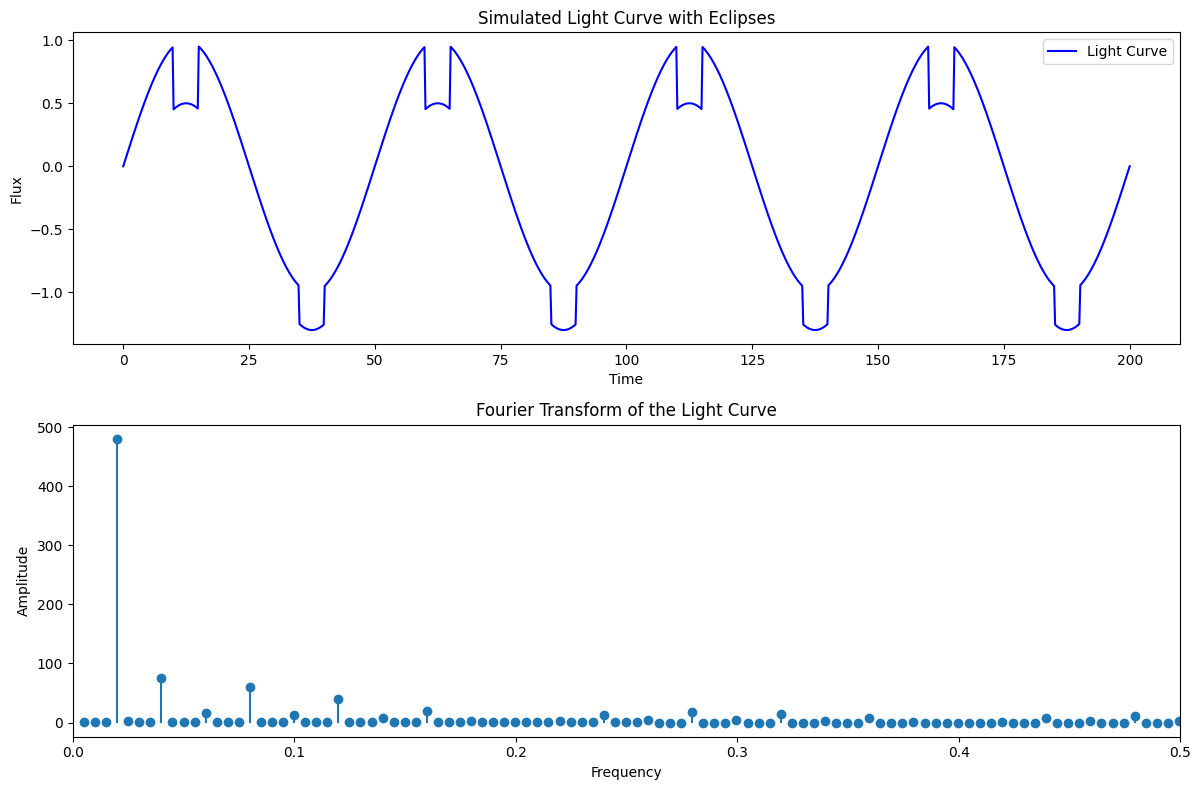

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
period = 50  # Period of the binary system (in arbitrary units)
frequency = 1 / period  # Base frequency
time = np.linspace(0, 200, 1000)  # Time array for 4 periods
amplitude = 1  # Amplitude of the base sine wave

# Base sine wave
base_signal = amplitude * np.sin(2 * np.pi * frequency * time)

# Adding primary eclipse (main dip) and secondary eclipse (smaller dip)
primary_eclipse_depth = -0.5  # Depth of the primary eclipse
secondary_eclipse_depth = -0.3  # Depth of the secondary eclipse
primary_eclipse_position = 0.25 * period  # Position of the primary eclipse within a period
secondary_eclipse_position = 0.75 * period  # Position of the secondary eclipse within a period
eclipse_width = 0.1 * period  # Width of each eclipse

# Generate eclipse dips
eclipse_signal = np.zeros_like(time)
for i, t in enumerate(time):
    # Modulo to find phase within one period
    phase = t % period
    if primary_eclipse_position - eclipse_width / 2 <= phase <= primary_eclipse_position + eclipse_width / 2:
        eclipse_signal[i] = primary_eclipse_depth
    elif secondary_eclipse_position - eclipse_width / 2 <= phase <= secondary_eclipse_position + eclipse_width / 2:
        eclipse_signal[i] = secondary_eclipse_depth

# Combined light curve
light_curve = base_signal + eclipse_signal

# Fourier Transform
frequencies = np.fft.fftfreq(len(time), d=(time[1] - time[0]))  # Frequency array
fft_values = np.fft.fft(light_curve)  # FFT of the light curve
positive_freqs = frequencies > 0  # Select positive frequencies

# Plotting
plt.figure(figsize=(12, 8))

# Original light curve
plt.subplot(2, 1, 1)
plt.plot(time, light_curve, label='Light Curve', color='blue')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Simulated Light Curve with Eclipses')
plt.legend()

# Fourier spectrum
plt.subplot(2, 1, 2)
plt.stem(frequencies[positive_freqs], np.abs(fft_values[positive_freqs]), basefmt=" ")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of the Light Curve')
plt.tight_layout()
plt.xlim(0, 0.5)

plt.show()
